# PPO Training

In [ ]:
import ray
from ray import train, tune
from ray.rllib.algorithms.ppo import PPOConfig
from ray.rllib.algorithms.algorithm import Algorithm
import json

import gym

numer_of_eps = 500

ray.shutdown()
ray.init()

config = PPOConfig()
config.env_runners(num_env_runners=1)
config.resources(num_gpus=1)
config.environment(env="ALE/Pacman-v5")
config.framework(framework='torch')
agent = config.build()


# agent = Algorithm.from_checkpoint("C:\\Users\\Isnal\\AppData\\Local\\Temp\\tmpsp6a7rfg")

# config = PPOConfig().training(lr=tune.grid_search([0.01, 0.001, 0.0001]))

# tuner = tune.Tuner(
#     "PPO",
#     run_config=train.RunConfig(
#         stop={"training_iteration": 1}
#     ),
#     param_space=config.to_dict(),
# )

# result = tuner.fit()

# epsiode_mean_rewards = []

# for ep in range(numer_of_eps):
#     result = agent.train()
#     print(result['episode_return_mean'])
#     epsiode_mean_rewards.append(result['episode_return_mean'])
#     with open('episode_rewards.json', 'w') as file:
#         json.dump({'rewards': epsiode_mean_rewards}, file)
#     if ep % 10 == 0:
#         checkpoint = agent.save()
#         print(f'EP: {ep} - Checkpoint at: {checkpoint.checkpoint.path}')

# # print(result)

# checkpoint = agent.save()
# print(f'Checkpoint at: {checkpoint.checkpoint.path}')



# Attempt to run the agent

In [ ]:
from ray.rllib.policy.policy import Policy
from ray.rllib.utils.policy import local_policy_inference

def evaluate_agent(agent):
    env = gym.make("ALE/Pacman-v5")
    # env = gym.make("ALE/Pacman-v5", render_mode="human")
    state, info = env.reset()
    print(state.shape)
    for t in count():
        # action = agent.compute_single_action(state)
        action = local_policy_inference(
            policy["default_policy"], "env_1", "agent_1", state, explore=False
        )
        observation, reward, terminated, truncated, _ = self.env.step(action)
        done = terminated or truncated
        if done:
            print(f'agent took {t}')
            break
        state = observation

evaluate_agent(agent)

# Visualise Training

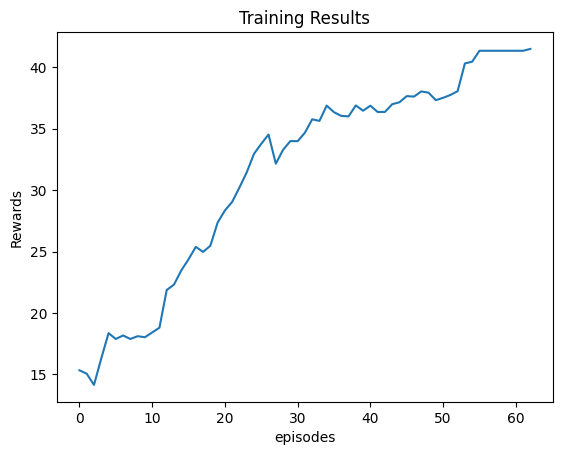

In [11]:
from matplotlib import pyplot as plt
import json
import os

with open(os.path.join(os.getcwd(), 'training_episode_rewards.json'), 'r') as file:
    data = json.load(file)['rewards']
plt.title("Training Results")
plt.xlabel('episodes')
plt.ylabel("Rewards")
plt.plot(data)
plt.show()